# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [62]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv

# Import the second file - Fake.csv
true_df = pd.read_csv('/True.csv')
fake_df = pd.read_csv('/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [6]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [7]:
# Print the column details for True News DataFrame
print(true_df.columns)

Index(['title', 'text', 'date'], dtype='object')


In [8]:
# Print the column details for Fake News Dataframe
print(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object')


In [9]:
# Print the column names of both DataFrames
print("True News Columns:")
print(true_df.columns)

print("\nFake News Columns:")
print(fake_df.columns)

True News Columns:
Index(['title', 'text', 'date'], dtype='object')

Fake News Columns:
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
print(combined_df.head())

                                                                                               title  \
0     The Very Scary Reason Trump’s Evangelicals Don’t Care About Cuts To Programs For Those In Need   
1             Catholic Church: It Is Not ‘Necessary’ For Bishops To Report Child Sex Abuse To Police   
2                           Ivanka Trump’s Hypocritical Mother’s Day Message Got DEMOLISHED By Women   
3  Eyewash: CIA Elites Misleading Employees Indicates That Conspiracies Are NOT ‘Ridiculous Fantasy’   
4                                      Iran says it does not interfere in Lebanese state affairs: TV   

                                                                                                                                                                                                                                                                                                                                                                                       

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
print(combined_df.isnull().sum())

title         21
text          21
date          42
news_label     0
dtype: int64


In [14]:
# Handle Rows with Null Values
combined_df.dropna(inplace=True)

# Reset index
combined_df.reset_index(drop=True, inplace=True)

# Verify cleanup
print("Null values after cleaning:")
print(combined_df.isnull().sum())
print("New dataset size:", combined_df.shape)

Null values after cleaning:
title         0
text          0
date          0
news_label    0
dtype: int64
New dataset size: (44898, 4)


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [15]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df.drop(['title', 'text', 'date'], axis=1, inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
print(combined_df.head())

   news_label  \
0           0   
1           0   
2           0   
3           0   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [16]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
import re
import spacy
from nltk.corpus import stopwords
from nltk import download
download('stopwords')

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

df_clean = pd.DataFrame()

# Preview the DataFrame
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


""


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [17]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers
import re

def clean_text(text):
    """
    Clean text by:
    - Converting to lowercase
    - Removing text in square brackets
    - Removing punctuation
    - Removing words with numbers
    """
    # Convert to lowercase
    text = text.lower()

    # Remove text inside square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [18]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['news_label'] = combined_df['news_label']
df_clean['clean_text'] = combined_df['news_text'].apply(clean_text)
# View result
df_clean.head()


,news_label,clean_text
0,0,the very scary reason trumps evangelicals dont care about cuts to programs for those in need as our current administration continues to prove that it has no actual concern for the working class it s hard to image why trump is supported by anyone other than the rich the white house s current budget proposals put support for the poor sick and elderly on the chopping block in favor of tax breaks for the wealthy besides being economically unjust wouldn t these slashes in services be against the christian obligation to charity why do evangelicals stand strong in their support for trumpthe fact that trump is a seemingly odd choice for political leadership among evangelicals has been debated since he first announced his bid to run the prevailing explanation for their support is that evangelicals merely tolerate trump because they care about fighting abortionlgbtq and therefore the preservation of their religious freedombut why the support for tax cuts over the assistance for those in need according to an article by religion dispatches it s about more than just toleration the huge budget cuts are part of the religious right keeping up their understanding of a biblical worldview and are an important part of its agendaaccording to sphere sovereignty a theory of how the bible rules every aspect of life god has given authority to men in government but this authority has very limited roles this view holds that man s role in civil government only allows for property protection and criminal punishment according to this view it is the families job to help the poor with some secondary help from the church if tax money is used to help the poor it is seen as tyrannically exceeding the biblical authority of the government and is considered stealingthis arcane position is held and popularized in some mainstream evangelical circles and articulated by radio host david barton it s also taught in christian school curricula and promoted in books and conferencesthis view is the basis for many new administration policies and the reason many of trump s appointees are trying to shut down the agencies they are in charge of even the department of education is being led by a person who strongly believes that it s the families responsibility to educate children and that civil government should stay out of ittrump himself probably doesn t hold these theoretical views but mike pence sure does and he s already making sure the biblical worldview is the basis for trump s policiesphoto by chip somodevillagetty images
1,0,catholic church it is not necessary for bishops to report child sex abuse to police the catholic church has a decades long and likely even longer than that history of covering up child sexual abuse they even looked the other way when child pornography was found within the walls of the vatican itself and now despite pope francis s declarations that he would put a stop to this recent actions and statements by the church strongly contradict thattimes live reports that a set of guidelines drawn up to train newly ordained bishops says the following according to the state of civil laws of each country where reporting is obligatory it is not necessarily the duty of the bishop to report suspects to authorities the police or state prosecutors in the moment when they are made aware of crimes or sinful deeds so in other words these people are telling their new bishops that they don t have to go to the cops if they find out someone in their charge is molesting kids that is in sharp contrast to pope francis s earlier statement which said everything possible must be done to rid the church of the scourge of the sexual abuse well your words are highminded pope francis but the guidelines regarding this issue are not nothing has changed you people might be pretending to be concerned about the continued victimization of the children within your parishes and under the charge of your priests and bishops but you aren t really all you care about

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [19]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
from tqdm import tqdm

def lemmatize_nouns_in_chunks(texts, chunk_size=5000):
    results = []
    for i in tqdm(range(0, len(texts), chunk_size)):
        chunk = texts[i:i+chunk_size]
        for doc in nlp.pipe(chunk, batch_size=100):
            lemmas = [
                token.lemma_ for token in doc
                if token.tag_ in ['NN', 'NNS']
                and token.lemma_ not in stop_words
                and not token.is_punct
                and not token.is_space
            ]
            results.append(' '.join(lemmas))
    return results


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [20]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
# Apply this to your cleaned text column
df_clean['noun_lemmas'] = lemmatize_nouns_in_chunks(df_clean['clean_text'].tolist())

# Preview result
df_clean[['clean_text', 'noun_lemmas']].head()

100%|██████████| 9/9 [34:40<00:00, 231.21s/it]


,clean_text,noun_lemmas
0,the very scary reason trumps evangelicals dont care about cuts to programs for those in need as our current administration continues to prove that it has no actual concern for the working class it s hard to image why trump is supported by anyone other than the rich the white house s current budget proposals put support for the poor sick and elderly on the chopping block in favor of tax breaks for the wealthy besides being economically unjust wouldn t these slashes in services be against the christian obligation to charity why do evangelicals stand strong in their support for trumpthe fact that trump is a seemingly odd choice for political leadership among evangelicals has been debated since he first announced his bid to run the prevailing explanation for their support is that evangelicals merely tolerate trump because they care about fighting abortionlgbtq and therefore the preservation of their religious freedombut why the support for tax cuts over the assistance for those in need according to an article by religion dispatches it s about more than just toleration the huge budget cuts are part of the religious right keeping up their understanding of a biblical worldview and are an important part of its agendaaccording to sphere sovereignty a theory of how the bible rules every aspect of life god has given authority to men in government but this authority has very limited roles this view holds that man s role in civil government only allows for property protection and criminal punishment according to this view it is the families job to help the poor with some secondary help from the church if tax money is used to help the poor it is seen as tyrannically exceeding the biblical authority of the government and is considered stealingthis arcane position is held and popularized in some mainstream evangelical circles and articulated by radio host david barton it s also taught in christian school curricula and promoted in books and conferencesthis view is the basis for many new administration policies and the reason many of trump s appointees are trying to shut down the agencies they are in charge of even the department of education is being led by a person who strongly believes that it s the families responsibility to educate children and that civil government should stay out of ittrump himself probably doesn t hold these theoretical views but mike pence sure does and he s already making sure the biblical worldview is the basis for trump s policiesphoto by chip somodevillagetty images,reason evangelical cut program need administration concern class image trump anyone budget proposal support block favor tax break slash service obligation charity evangelical support fact trump choice leadership evangelical bid explanation support evangelical trump preservation freedombut support tax cut assistance need article religion dispatch budget cut part right keeping understanding worldview part agendaaccording sovereignty theory aspect life authority man government authority role view man role government property protection punishment view family job help church tax money authority government position circle radio host school curricula book view basis administration policy reason trump appointee agency charge department education person family responsibility child government ittrump view worldview basis trump policiesphoto chip image
1,catholic church it is not necessary for bishops to report child sex abuse to police the catholic church has a decades long and likely even longer than that history of covering up child sexual abuse they even looked the other way when child pornography was found within the walls of the vatican itself and now despite pope francis s declarations that he would put a stop to this recent actions and statements by the church strongly contradict thattimes live reports that a set of guidelines drawn up to train newly ordained bishops says the following according to the state of civil laws of each

### Save the Cleaned data as a csv file (Recommended)

In [21]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean_new = pd.read_csv("clean_df.csv")

In [22]:
# Check the first few rows of the DataFrame
df_clean_new.head()

,news_label,clean_text,noun_lemmas
0,0,the very scary reason trumps evangelicals dont care about cuts to programs for those in need as our current administration continues to prove that it has no actual concern for the working class it s hard to image why trump is supported by anyone other than the rich the white house s current budget proposals put support for the poor sick and elderly on the chopping block in favor of tax breaks for the wealthy besides being economically unjust wouldn t these slashes in services be against the christian obligation to charity why do evangelicals stand strong in their support for trumpthe fact that trump is a seemingly odd choice for political leadership among evangelicals has been debated since he first announced his bid to run the prevailing explanation for their support is that evangelicals merely tolerate trump because they care about fighting abortionlgbtq and therefore the preservation of their religious freedombut why the support for tax cuts over the assistance for those in need according to an article by religion dispatches it s about more than just toleration the huge budget cuts are part of the religious right keeping up their understanding of a biblical worldview and are an important part of its agendaaccording to sphere sovereignty a theory of how the bible rules every aspect of life god has given authority to men in government but this authority has very limited roles this view holds that man s role in civil government only allows for property protection and criminal punishment according to this view it is the families job to help the poor with some secondary help from the church if tax money is used to help the poor it is seen as tyrannically exceeding the biblical authority of the government and is considered stealingthis arcane position is held and popularized in some mainstream evangelical circles and articulated by radio host david barton it s also taught in christian school curricula and promoted in books and conferencesthis view is the basis for many new administration policies and the reason many of trump s appointees are trying to shut down the agencies they are in charge of even the department of education is being led by a person who strongly believes that it s the families responsibility to educate children and that civil government should stay out of ittrump himself probably doesn t hold these theoretical views but mike pence sure does and he s already making sure the biblical worldview is the basis for trump s policiesphoto by chip somodevillagetty images,reason evangelical cut program need administration concern class image trump anyone budget proposal support block favor tax break slash service obligation charity evangelical support fact trump choice leadership evangelical bid explanation support evangelical trump preservation freedombut support tax cut assistance need article religion dispatch budget cut part right keeping understanding worldview part agendaaccording sovereignty theory aspect life authority man government authority role view man role government property protection punishment view family job help church tax money authority government position circle radio host school curricula book view basis administration policy reason trump appointee agency charge department education person family responsibility child government ittrump view worldview basis trump policiesphoto chip image
1,0,catholic church it is not necessary for bishops to report child sex abuse to police the catholic church has a decades long and likely even longer than that history of covering up child sexual abuse they even looked the other way when child pornography was found within the walls of the vatican itself and now despite pope francis s declarations that he would put a stop to this recent actions and statements by the church strongly contradict thattimes live reports that a set of guidelines drawn up to train newly ordained bishops says the following according to the state of civ

In [23]:
# Check the dimensions of the DataFrame
df_clean_new.shape

(44898, 3)

In [24]:
# Check the number of non-null entries and data types of each column
df_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   news_label   44898 non-null  int64 
 1   clean_text   44889 non-null  object
 2   noun_lemmas  44878 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [25]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
df_clean_new = df_clean_new.dropna(subset=['clean_text', 'noun_lemmas'])

# Split into features and labels
X = df_clean_new['noun_lemmas']
y = df_clean_new['news_label']

# Split into train and validation sets (70/30 split)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [26]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean_new['clean_text_len'] = df_clean_new['clean_text'].astype(str).str.len()
df_clean_new['noun_lemmas_len'] = df_clean_new['noun_lemmas'].astype(str).str.len()

# Preview
df_clean_new[['clean_text', 'clean_text_len', 'noun_lemmas', 'noun_lemmas_len']].head()

,clean_text,clean_text_len,noun_lemmas,noun_lemmas_len
0,the very scary reason trumps evangelicals dont care about cuts to programs for those in need as our current administration continues to prove that it has no actual concern for the working class it s hard to image why trump is supported by anyone other than the rich the white house s current budget proposals put support for the poor sick and elderly on the chopping block in favor of tax breaks for the wealthy besides being economically unjust wouldn t these slashes in services be against the christian obligation to charity why do evangelicals stand strong in their support for trumpthe fact that trump is a seemingly odd choice for political leadership among evangelicals has been debated since he first announced his bid to run the prevailing explanation for their support is that evangelicals merely tolerate trump because they care about fighting abortionlgbtq and therefore the preservation of their religious freedombut why the support for tax cuts over the assistance for those in need according to an article by religion dispatches it s about more than just toleration the huge budget cuts are part of the religious right keeping up their understanding of a biblical worldview and are an important part of its agendaaccording to sphere sovereignty a theory of how the bible rules every aspect of life god has given authority to men in government but this authority has very limited roles this view holds that man s role in civil government only allows for property protection and criminal punishment according to this view it is the families job to help the poor with some secondary help from the church if tax money is used to help the poor it is seen as tyrannically exceeding the biblical authority of the government and is considered stealingthis arcane position is held and popularized in some mainstream evangelical circles and articulated by radio host david barton it s also taught in christian school curricula and promoted in books and conferencesthis view is the basis for many new administration policies and the reason many of trump s appointees are trying to shut down the agencies they are in charge of even the department of education is being led by a person who strongly believes that it s the families responsibility to educate children and that civil government should stay out of ittrump himself probably doesn t hold these theoretical views but mike pence sure does and he s already making sure the biblical worldview is the basis for trump s policiesphoto by chip somodevillagetty images,2522,reason evangelical cut program need administration concern class image trump anyone budget proposal support block favor tax break slash service obligation charity evangelical support fact trump choice leadership evangelical bid explanation support evangelical trump preservation freedombut support tax cut assistance need article religion dispatch budget cut part right keeping understanding worldview part agendaaccording sovereignty theory aspect life authority man government authority role view man role government property protection punishment view family job help church tax money authority government position circle radio host school curricula book view basis administration policy reason trump appointee agency charge department education person family responsibility child government ittrump view worldview basis trump policiesphoto chip image,854
1,catholic church it is not necessary for bishops to report child sex abuse to police the catholic church has a decades long and likely even longer than that history of covering up child sexual abuse they even looked the other way when child pornography was found within the walls of the vatican itself and now despite pope francis s declarations that he would put a stop to this recent actions and statements by the church strongly contradict thattimes live reports that a set of guidelines drawn up to train newly ordained bishops says the following acco

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

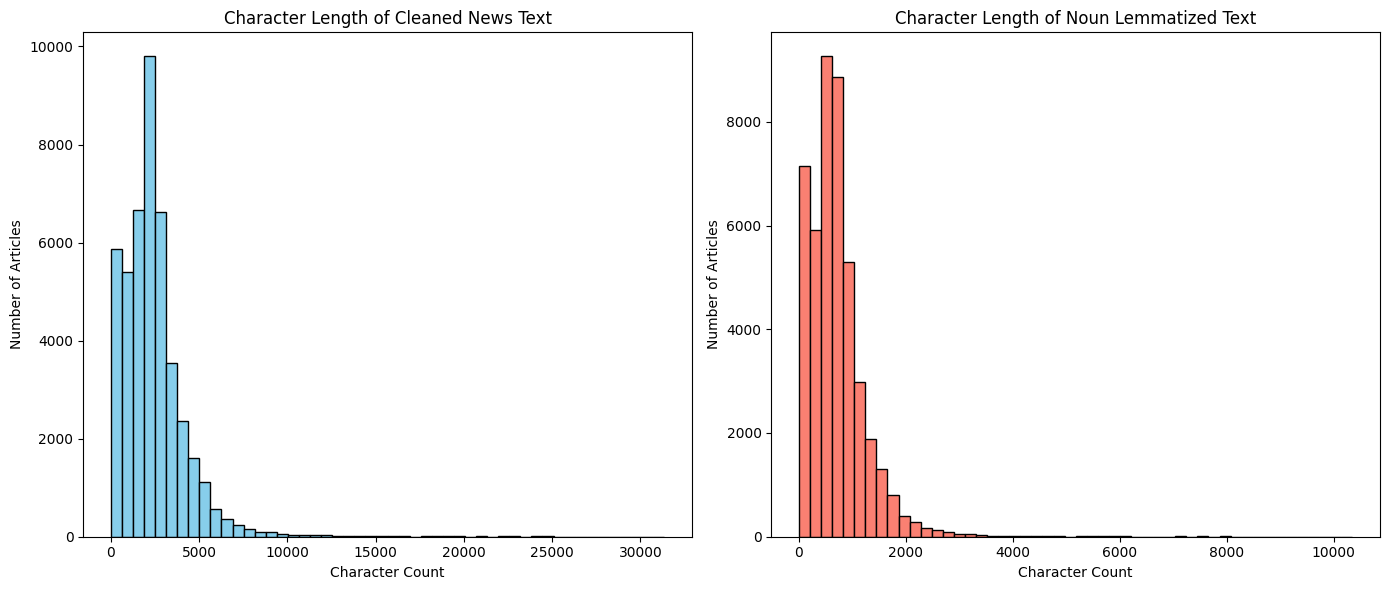

In [27]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(14, 6))

# Histogram for clean_text_len
plt.subplot(1, 2, 1)
plt.hist(df_clean_new['clean_text_len'], bins=50, color='skyblue', edgecolor='black')
plt.title('Character Length of Cleaned News Text')
plt.xlabel('Character Count')
plt.ylabel('Number of Articles')

# Histogram for noun_lemmas_len
plt.subplot(1, 2, 2)
plt.hist(df_clean_new['noun_lemmas_len'], bins=50, color='salmon', edgecolor='black')
plt.title('Character Length of Noun Lemmatized Text')
plt.xlabel('Character Count')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

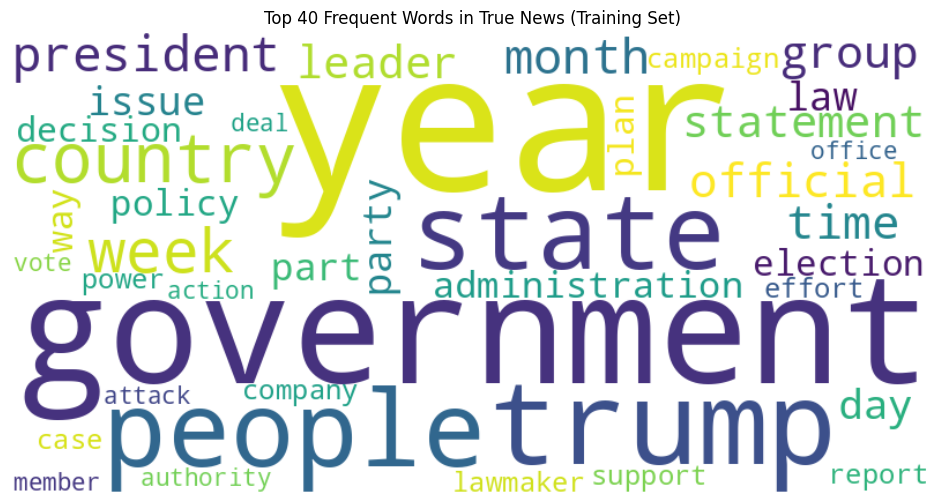

In [28]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter True news (label = 1) from training data
true_news_text = X_train[y_train == 1]

# Join all noun_lemmas into a single string
true_news_corpus = ' '.join(true_news_text.astype(str).tolist())

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=40,
                      colormap='viridis').generate(true_news_corpus)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Frequent Words in True News (Training Set)")
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

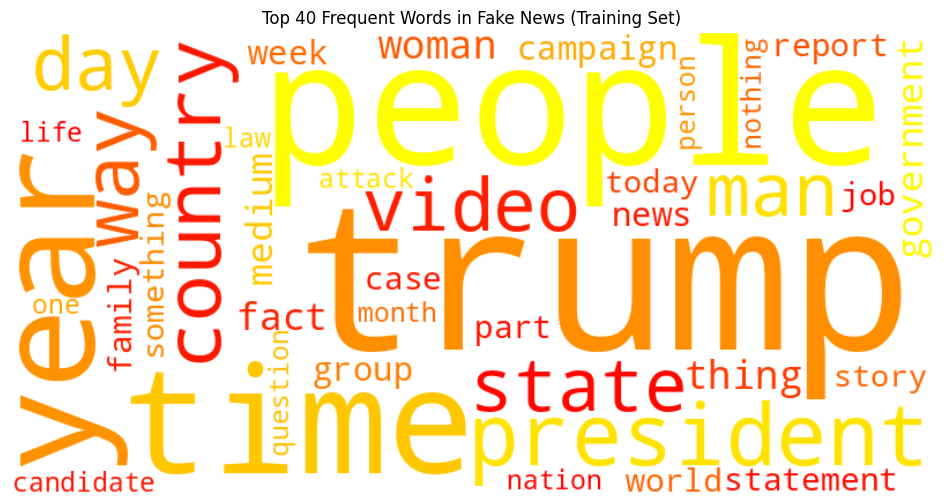

In [29]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter fake news (label = 0) from training data
fake_news_text = X_train[y_train == 0]

# Step 2: Convert to string, handle any non-string values
fake_news_corpus = ' '.join(fake_news_text.astype(str).tolist())

# Step 3: Create the WordCloud
wordcloud_fake = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=40,
    colormap='autumn'  # You can use other colormaps like 'viridis', 'plasma', etc.
).generate(fake_news_corpus)

# Step 4: Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Frequent Words in Fake News (Training Set)")
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [30]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=20):
    """
    Extract top n most frequent n-grams from a given corpus.

    Args:
        corpus (Series or list): List or Series of text data.
        ngram_range (tuple): n-gram range, e.g., (1,1) for unigrams, (2,2) for bigrams, (3,3) for trigrams.
        top_n (int): Number of top n-grams to return.

    Returns:
        DataFrame: Top n n-grams with frequency counts.
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vec.fit_transform(corpus.astype(str))
    sum_words = ngram_counts.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:top_n], columns=['ngram', 'frequency'])

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [31]:
# Handle NaN values in the text data

df_clean_new = df_clean_new.dropna(subset=['clean_text', 'noun_lemmas']).reset_index(drop=True)


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

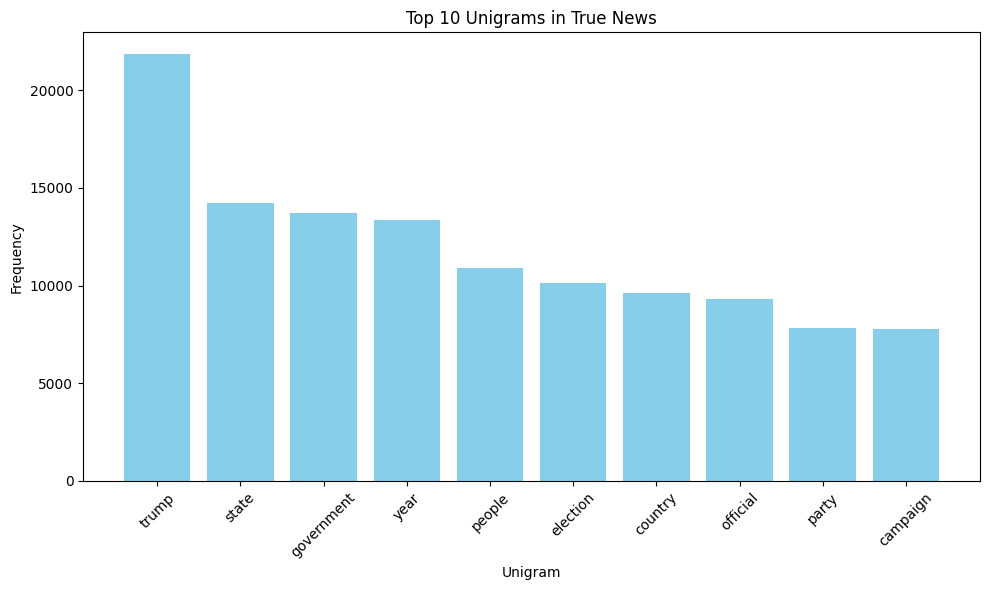

In [32]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Filter true news from training data (label == 1)
true_news_text = X_train[y_train == 1]

# Get top 10 unigrams using your function
top_unigrams_true = get_top_ngrams(true_news_text, ngram_range=(1, 1), top_n=10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_unigrams_true['ngram'], top_unigrams_true['frequency'], color='skyblue')
plt.title("Top 10 Unigrams in True News")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



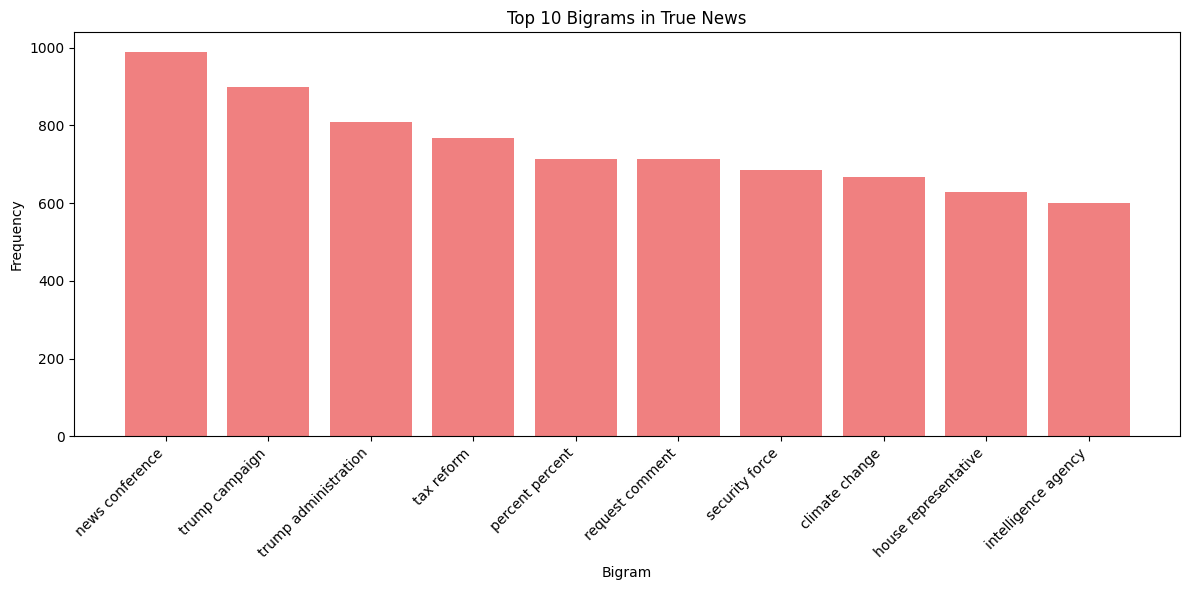

In [33]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Filter true news from training data (label == 1)
true_news_text = X_train[y_train == 1]

# Use existing get_top_ngrams function with bigram range
top_bigrams_true = get_top_ngrams(true_news_text, ngram_range=(2, 2), top_n=10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_bigrams_true['ngram'], top_bigrams_true['frequency'], color='lightcoral')
plt.title("Top 10 Bigrams in True News")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



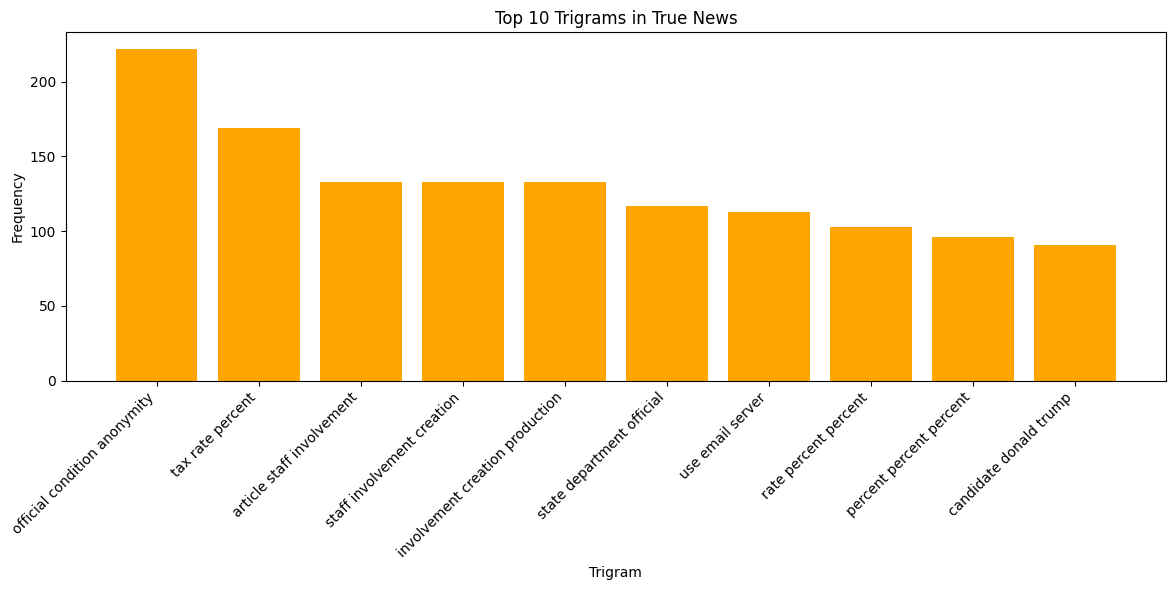

In [34]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Filter true news from training data (label == 1)
true_news_text = X_train[y_train == 1]

# Get top 10 trigrams using your ngram extraction function
top_trigrams_true = get_top_ngrams(true_news_text, ngram_range=(3, 3), top_n=10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_trigrams_true['ngram'], top_trigrams_true['frequency'], color='orange')
plt.title("Top 10 Trigrams in True News")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

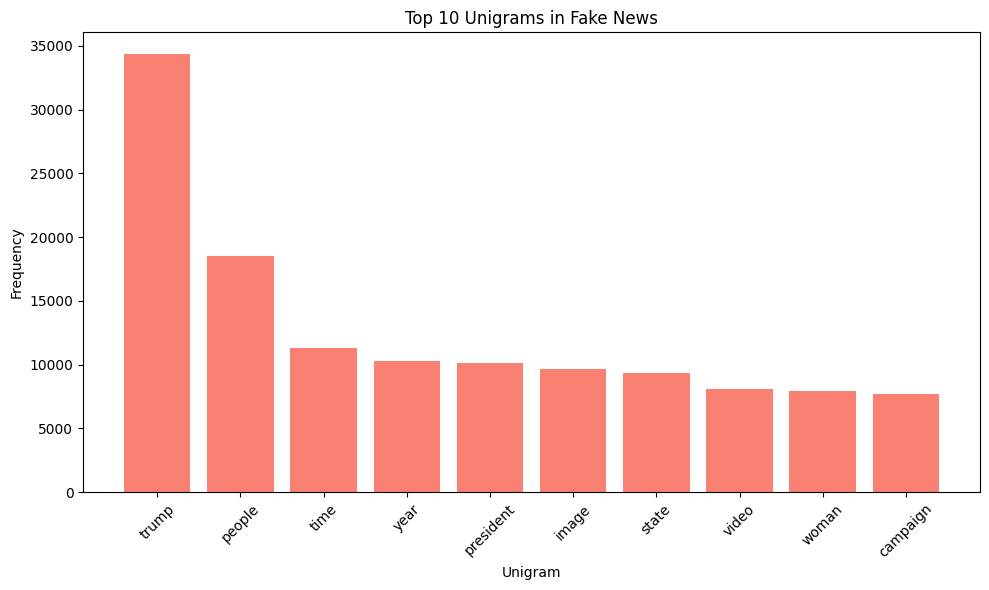

In [35]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Filter fake news from training data (label == 0)
fake_news_text = X_train[y_train == 0]

# Get top 10 unigrams using your ngram extraction function
top_unigrams_fake = get_top_ngrams(fake_news_text, ngram_range=(1, 1), top_n=10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_unigrams_fake['ngram'], top_unigrams_fake['frequency'], color='salmon')
plt.title("Top 10 Unigrams in Fake News")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



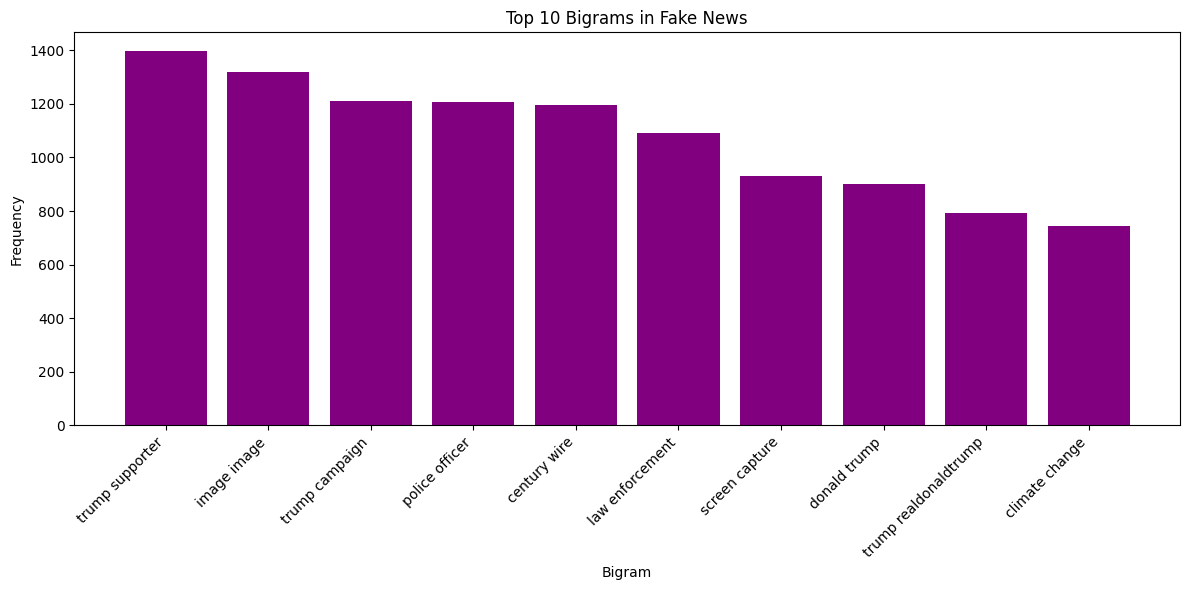

In [36]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Filter fake news from training data (label == 0)
fake_news_text = X_train[y_train == 0]

# Use existing get_top_ngrams function with bigram range
top_bigrams_fake = get_top_ngrams(fake_news_text, ngram_range=(2, 2), top_n=10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_bigrams_fake['ngram'], top_bigrams_fake['frequency'], color='purple')
plt.title("Top 10 Bigrams in Fake News")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



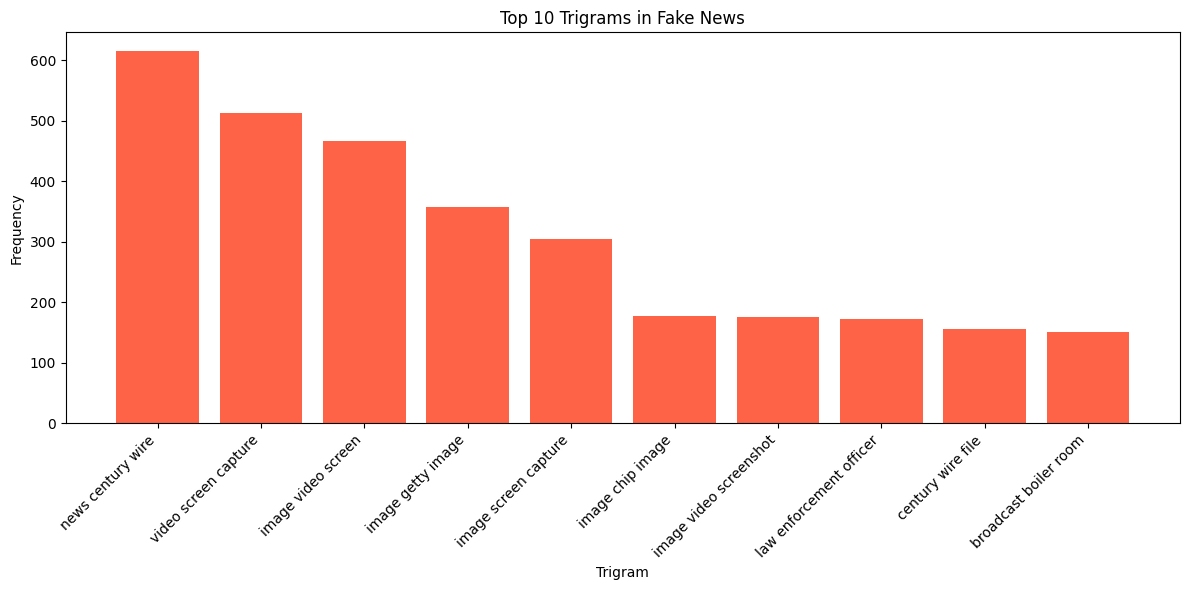

In [37]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Filter fake news from training data (label == 0)
fake_news_text = X_train[y_train == 0]

# Get top 10 trigrams
top_trigrams_fake = get_top_ngrams(fake_news_text, ngram_range=(3, 3), top_n=10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_trigrams_fake['ngram'], top_trigrams_fake['frequency'], color='tomato')
plt.title("Top 10 Trigrams in Fake News")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [38]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [39]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [40]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [41]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [42]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [43]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [44]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [45]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [46]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [47]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [48]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [49]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [50]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
!pip install gensim
import gensim.downloader as api

# Load the model (will download if not cached)
w2v_model = api.load("word2vec-google-news-300")

# Check vector for a word
print(w2v_model['news'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.9 MB/s eta 0:00:00
[==================================================] 100.0% 1662.8/1662.8MB downloaded
[-0.13867188  0.04370117 -0.13085938 -0.16796875 -0.06054688 -0.07080078
  0.00854492 -0.09960938  0.19628906  0.14648438 -0.23046875 -0.09619141
 -0.140625    0.25585938 -0.16699219  0.14257812 -0.16992188  0.06884766
  0.23925781 -0.28515625  0.17089844  0.17089844  0.05615234 -0.06445312
  0.13867188  0.32226562  0.05078125  0.27148438 -0.00564575  0.02587891
 -0.05639648  0.03125     0.171875   -0.18261719  0.05029297 -0.01062012
 -0.02600098  0.20019531 -0.07568359  0.125       0.01300049 -0.17089844
 -0.09667969  0.21972656  0.06494141  0.24804688  0.11083984  0.0267334
 -0.10986328  0.17578125  0.328125   -0.11865234  0.03222656  0.30273438
  0.09179688 -0.05224609 -0.27539062 -0.046875    0.20996094 -0.20410156
  0.10595703 -0.08398438 -0.09765625 -0.16015625 -0.0045166   0.09228516
  0.05737305 -0.04418945  0.0644

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [51]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
import numpy as np

def document_vector(doc, model):
    """
    Average Word2Vec embeddings for a document (list of words).
    Only includes words present in the model's vocabulary.
    """
    words = doc.split()
    valid_words = [word for word in words if word in model.key_to_index]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean(model[valid_words], axis=0)
# Extract document embeddings for training set
X_train_vectors = np.array([document_vector(doc, w2v_model) for doc in X_train])

# Extract document embeddings for validation set
X_val_vectors = np.array([document_vector(doc, w2v_model) for doc in X_val])
## Extract the target variable for the training data and validation data
# Extract target labels
y_train_target = y_train.values
y_val_target = y_val.values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [53]:
## Initialise Logistic Regression model

## Train Logistic Regression model on training data

## Predict on validation data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on training vectors and labels
log_reg_model.fit(X_train_vectors, y_train_target)
y_val_pred = log_reg_model.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [63]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Accuracy
print("Validation Accuracy:", accuracy_score(y_val_target, y_val_pred))

# Classification Report
print("\nClassification Report of Logistic regression:\n", classification_report(y_val_target, y_val_pred))

Validation Accuracy: 0.8982471776589424

Classification Report of Logistic regression:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7039
           1       0.89      0.90      0.89      6425

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464



In [64]:
# Classification Report
from sklearn.metrics import classification_report

# Generate and print classification report
print("Classification Report of logistic regression:\n")
print(classification_report(y_val_target, y_val_pred, target_names=["Fake News", "True News"]))

Classification Report of logistic regression:

              precision    recall  f1-score   support

   Fake News       0.91      0.90      0.90      7039
   True News       0.89      0.90      0.89      6425

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [56]:
## Initialise Decision Tree model

## Train Decision Tree model on training data

## Predict on validation data
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
dt_model.fit(X_train_vectors, y_train_target)
y_val_pred_dt = dt_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [57]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val_target, y_val_pred_dt)
precision = precision_score(y_val_target, y_val_pred_dt)
recall = recall_score(y_val_target, y_val_pred_dt)
f1 = f1_score(y_val_target, y_val_pred_dt)

# Print all metrics
print(f"Decision Tree Model Performance on Validation Set:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Decision Tree Model Performance on Validation Set:
Accuracy : 0.8241
Precision: 0.8328
Recall   : 0.7900
F1 Score : 0.8109


In [58]:
# Classification Report
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report for Decision Tree Model:\n")
print(classification_report(y_val_target, y_val_pred_dt, target_names=["Fake News", "True News"]))

Classification Report for Decision Tree Model:

              precision    recall  f1-score   support

   Fake News       0.82      0.86      0.84      7039
   True News       0.83      0.79      0.81      6425

    accuracy                           0.82     13464
   macro avg       0.82      0.82      0.82     13464
weighted avg       0.82      0.82      0.82     13464



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [59]:
## Initialise Random Forest model

## Train Random Forest model on training data

## Predict on validation data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train_vectors, y_train_target)
y_val_pred_rf = rf_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [60]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val_target, y_val_pred_rf)
precision = precision_score(y_val_target, y_val_pred_rf)
recall = recall_score(y_val_target, y_val_pred_rf)
f1 = f1_score(y_val_target, y_val_pred_rf)

# Print metrics
print("Random Forest Model Performance on Validation Set:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Random Forest Model Performance on Validation Set:
Accuracy : 0.9073
Precision: 0.9115
Recall   : 0.8925
F1 Score : 0.9019


In [61]:
# Classification Report
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report for Random Forest Model:\n")
print(classification_report(y_val_target, y_val_pred_rf, target_names=["Fake News", "True News"]))


Classification Report for Random Forest Model:

              precision    recall  f1-score   support

   Fake News       0.90      0.92      0.91      7039
   True News       0.91      0.89      0.90      6425

    accuracy                           0.91     13464
   macro avg       0.91      0.91      0.91     13464
weighted avg       0.91      0.91      0.91     13464



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

* True news used more formal and topic-specific words (like government
or policy), while fake news often used emotional or dramatic words (like video, story, woman) to catch attention.
* We used Word2Vec to understand the meaning of words in context, which helped the model figure out the difference between real and fake news more accurately.
* Out of the three models we tested, the Random Forest model worked the best, giving us 91% accuracy.
* We focused on accuracy and F1-score, which helped us check how well the model avoided wrong predictions for both fake and real news.
* The graphs and word clouds showed that fake and real news use very different kinds of language, which helped us design better features for our model.
* Using word meaning and a strong model like Random Forest made it easier to spot fake news, which is helpful for fighting misinformation online.
